In [75]:
import math
from matplotlib import pyplot as plt

#thx from https://stackoverflow.com/questions/3831144/finding-the-squares-in-a-plane-given-n-points

In [76]:
def distPoints(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

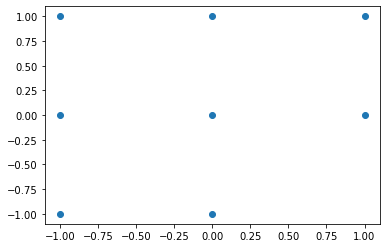

In [77]:
x = [-1,0,0,0,1,-1,-1,1]
y = [-1, -1, 0, 1, 0, 0, 1, 1]
plt.plot(x,y, 'o')

In [78]:
coords = []
for i in range(len(x)):
    coords.append((x[i],y[i]))
coords

[(-1, -1), (0, -1), (0, 0), (0, 1), (1, 0), (-1, 0), (-1, 1), (1, 1)]

In [81]:
distMap = {}
tot = 0
squares = []
for i in range(len(coords)-1):
    for j in range(i+1, len(coords)):
        
        # find distance between the 2 points
        dist = distPoints(coords[i], coords[j])
        
        # new distance found
        if dist not in distMap:
            distMap[dist] = [[coords[i], coords[j]]]
            
        # existing distance has been found, check if a pair of points exists that make a square all together
        else:
            for q in range(len(distMap[dist])-2):
                p = distMap[dist][q]
                if p[0] == coords[i] or p[0] == coords[j] or p[1] == coords[i] or p[1] == coords[j]:
                    continue
                    
                # two possible valid pairings, check for both
                pair1a, pair1b, c1 = {coords[i], p[0]}, {coords[j], p[1]}, 0
                pair2a, pair2b, c2 = {coords[i], p[1]}, {coords[j], p[0]}, 0
                
                for r in range(q+1, len(distMap[dist])):
                    checkP = set(distMap[dist][r])
                    if checkP == pair1a or checkP == pair1b:
                        c1 += 1
                    elif checkP == pair2a or checkP == pair2b:
                        c2 +=1
                    
                    # slight optimization where an equilateral triangle is formed so we disregard that
                    if c1 == 1 and c2 == 1:
                        continue
                        
                    # once four points are found, no need to continue checking
                    if c1 == 2 or c2 == 2:
                        print("Found square:", coords[i], coords[j], p[0], p[1])
                        tot += 1
                        squares_coords = []
                        squares_coords.append(coords[i])
                        squares_coords.append(coords[j])
                        squares_coords.append(p[0])
                        squares_coords.append(p[1])
                        squares.append(squares_coords)
                        break
                        
            # add the current point to the list
            distMap[dist].append([coords[i], coords[j]])
distMap

Found square: (0, 0) (-1, 0) (-1, -1) (0, -1)
Found square: (0, 1) (-1, 0) (0, -1) (1, 0)
Found square: (1, 0) (1, 1) (0, 0) (0, 1)
Found square: (-1, 0) (-1, 1) (0, 0) (0, 1)


{1.0: [[(-1, -1), (0, -1)],
  [(-1, -1), (-1, 0)],
  [(0, -1), (0, 0)],
  [(0, 0), (0, 1)],
  [(0, 0), (1, 0)],
  [(0, 0), (-1, 0)],
  [(0, 1), (-1, 1)],
  [(0, 1), (1, 1)],
  [(1, 0), (1, 1)],
  [(-1, 0), (-1, 1)]],
 1.4142135623730951: [[(-1, -1), (0, 0)],
  [(0, -1), (1, 0)],
  [(0, -1), (-1, 0)],
  [(0, 0), (-1, 1)],
  [(0, 0), (1, 1)],
  [(0, 1), (1, 0)],
  [(0, 1), (-1, 0)]],
 2.23606797749979: [[(-1, -1), (0, 1)],
  [(-1, -1), (1, 0)],
  [(0, -1), (-1, 1)],
  [(0, -1), (1, 1)],
  [(1, 0), (-1, 1)],
  [(-1, 0), (1, 1)]],
 2.0: [[(-1, -1), (-1, 1)],
  [(0, -1), (0, 1)],
  [(1, 0), (-1, 0)],
  [(-1, 1), (1, 1)]],
 2.8284271247461903: [[(-1, -1), (1, 1)]]}

In [80]:
#print("Num of squares:", tot)
#print(squares)
#squares_x = []
#squares_y = []
#min_x, max_x = min(x), max(x)
#min_y, max_y = min(y), max(y)
#plt.xlim(min_x, max_x)
#plt.ylim(min_y, max_y)
#for s in squares:
#    for x,y in s:
#        squares_x.append(x)
#        squares_y.append(y)
#    plt.figure()    
#    plt.plot(squares_x, squares_y, 'o')
#    squares_x = []
#    squares_y = []